In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [170]:
df = pd.read_excel("data/FairuzDebyTamara TA.xlsx",index_col="ID")
df.head()

,FVF,K,Q,Refpres,Thicknes,Visc,BHP,SLOPE,SKIN
ID,,,,,,,,,
1,1.21,86.631,2500,6009,23.0,0.92,5905.4502,227.108079,-3.05979
2,1.33,87.231,2740,5769,26.0,0.98,5369.5200,256.038115,-3.37194
3,1.09,84.831,2680,5889,24.2,0.74,5857.5469,171.215706,-2.17501
4,1.27,84.231,2500,6189,24.8,0.74,5638.0732,182.882586,-2.42630
5,1.45,84.831,2440,6009,21.8,0.80,5511.7393,248.861249,-3.38240


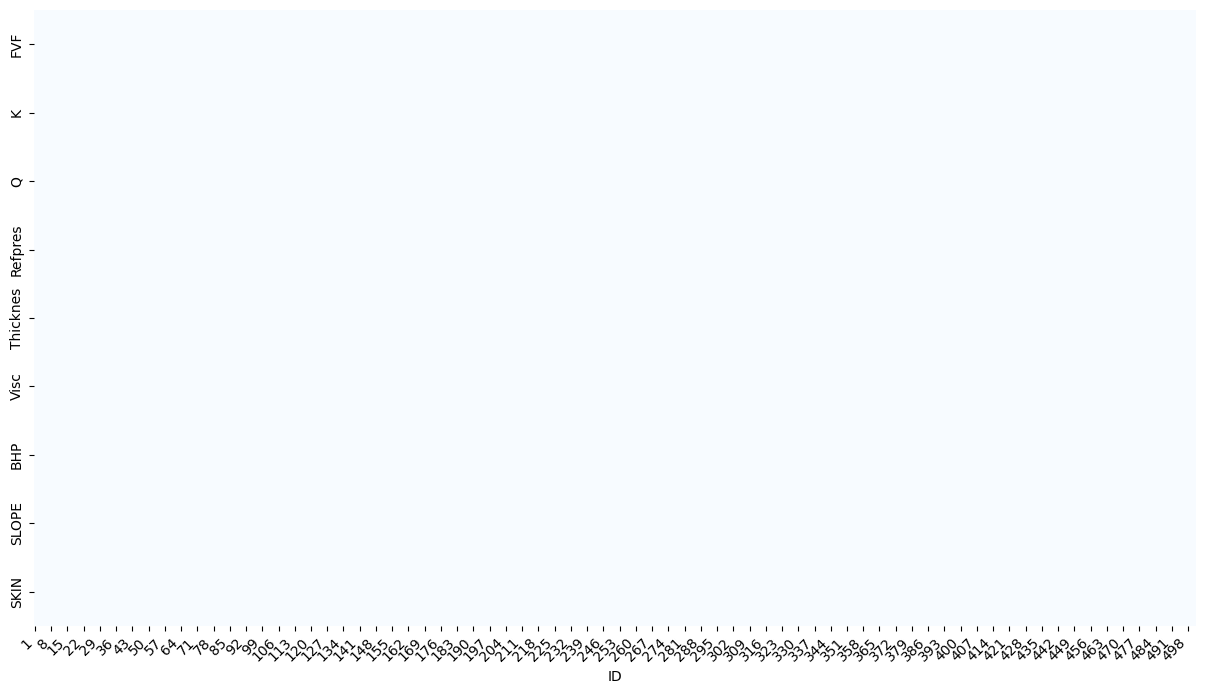

In [171]:
plot_missing_value(df)

In [172]:
df.columns

Index(['FVF', 'K', 'Q', 'Refpres', 'Thicknes', 'Visc', 'BHP', 'SLOPE', 'SKIN'], dtype='object')

In [173]:
df.drop(columns = (['BHP']), inplace = True)

In [174]:
df.tail(10)

,FVF,K,Q,Refpres,Thicknes,Visc,SLOPE,SKIN
ID,,,,,,,,
492,0.940,84.891,2221,6309,25.34,1.085,171.221553,-1.98421
493,1.006,84.891,2218,6306,24.89,1.136,195.061630,-2.44945
494,0.913,85.281,2239,6297,25.46,0.932,142.675907,-1.26328
495,0.934,84.351,2200,6309,26.00,1.064,162.094449,-1.76586
496,0.991,84.291,2263,6309,25.73,1.121,188.479174,-2.33010
497,0.910,85.011,2272,6306,25.94,1.139,173.639645,-2.01626
498,0.943,84.051,2224,6303,25.94,1.076,168.293147,-1.91389
499,1.000,84.321,2278,6306,25.37,1.067,184.749157,-2.28169
500,0.949,84.591,2212,6300,25.70,1.061,166.582731,-1.88238


In [175]:
df.head()

,FVF,K,Q,Refpres,Thicknes,Visc,SLOPE,SKIN
ID,,,,,,,,
1,1.21,86.631,2500,6009,23.0,0.92,227.108079,-3.05979
2,1.33,87.231,2740,5769,26.0,0.98,256.038115,-3.37194
3,1.09,84.831,2680,5889,24.2,0.74,171.215706,-2.17501
4,1.27,84.231,2500,6189,24.8,0.74,182.882586,-2.42630
5,1.45,84.831,2440,6009,21.8,0.80,248.861249,-3.38240


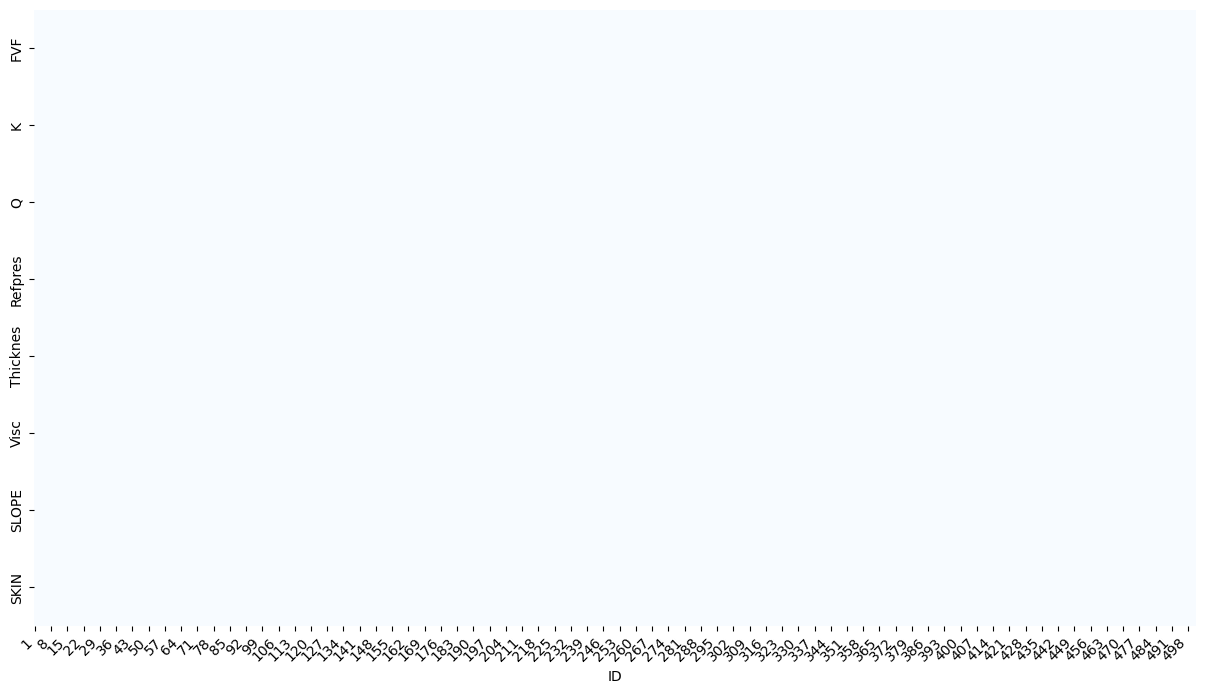

In [176]:
plot_missing_value(df)

<AxesSubplot: >

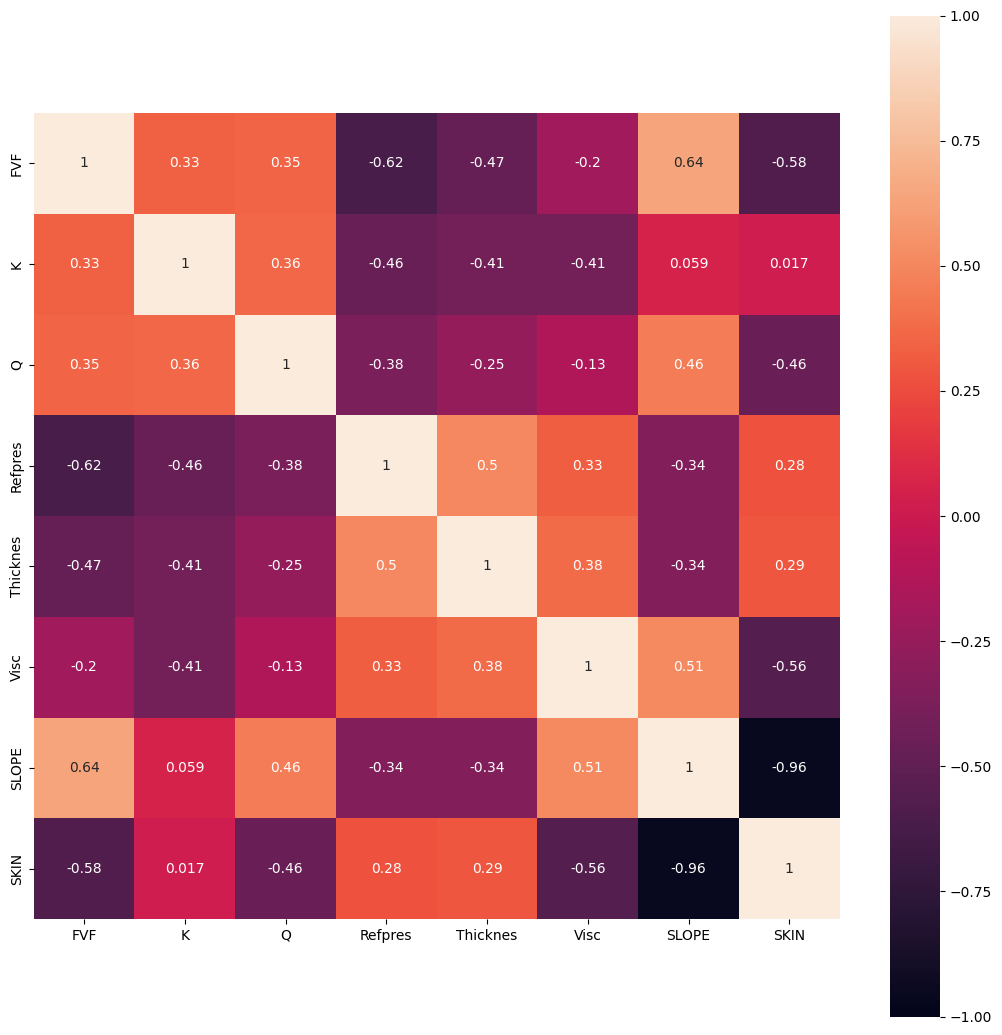

In [177]:
plt.figure(figsize=(13, 13))
sns.heatmap(df.corr(), cbar='false', vmin=-1, vmax=1, annot=True, square=True)

array([[<AxesSubplot: title={'center': 'FVF'}>,
        <AxesSubplot: title={'center': 'K'}>,
        <AxesSubplot: title={'center': 'Q'}>],
       [<AxesSubplot: title={'center': 'Refpres'}>,
        <AxesSubplot: title={'center': 'Thicknes'}>,
        <AxesSubplot: title={'center': 'Visc'}>],
       [<AxesSubplot: title={'center': 'SLOPE'}>,
        <AxesSubplot: title={'center': 'SKIN'}>, <AxesSubplot: >]],
      dtype=object)

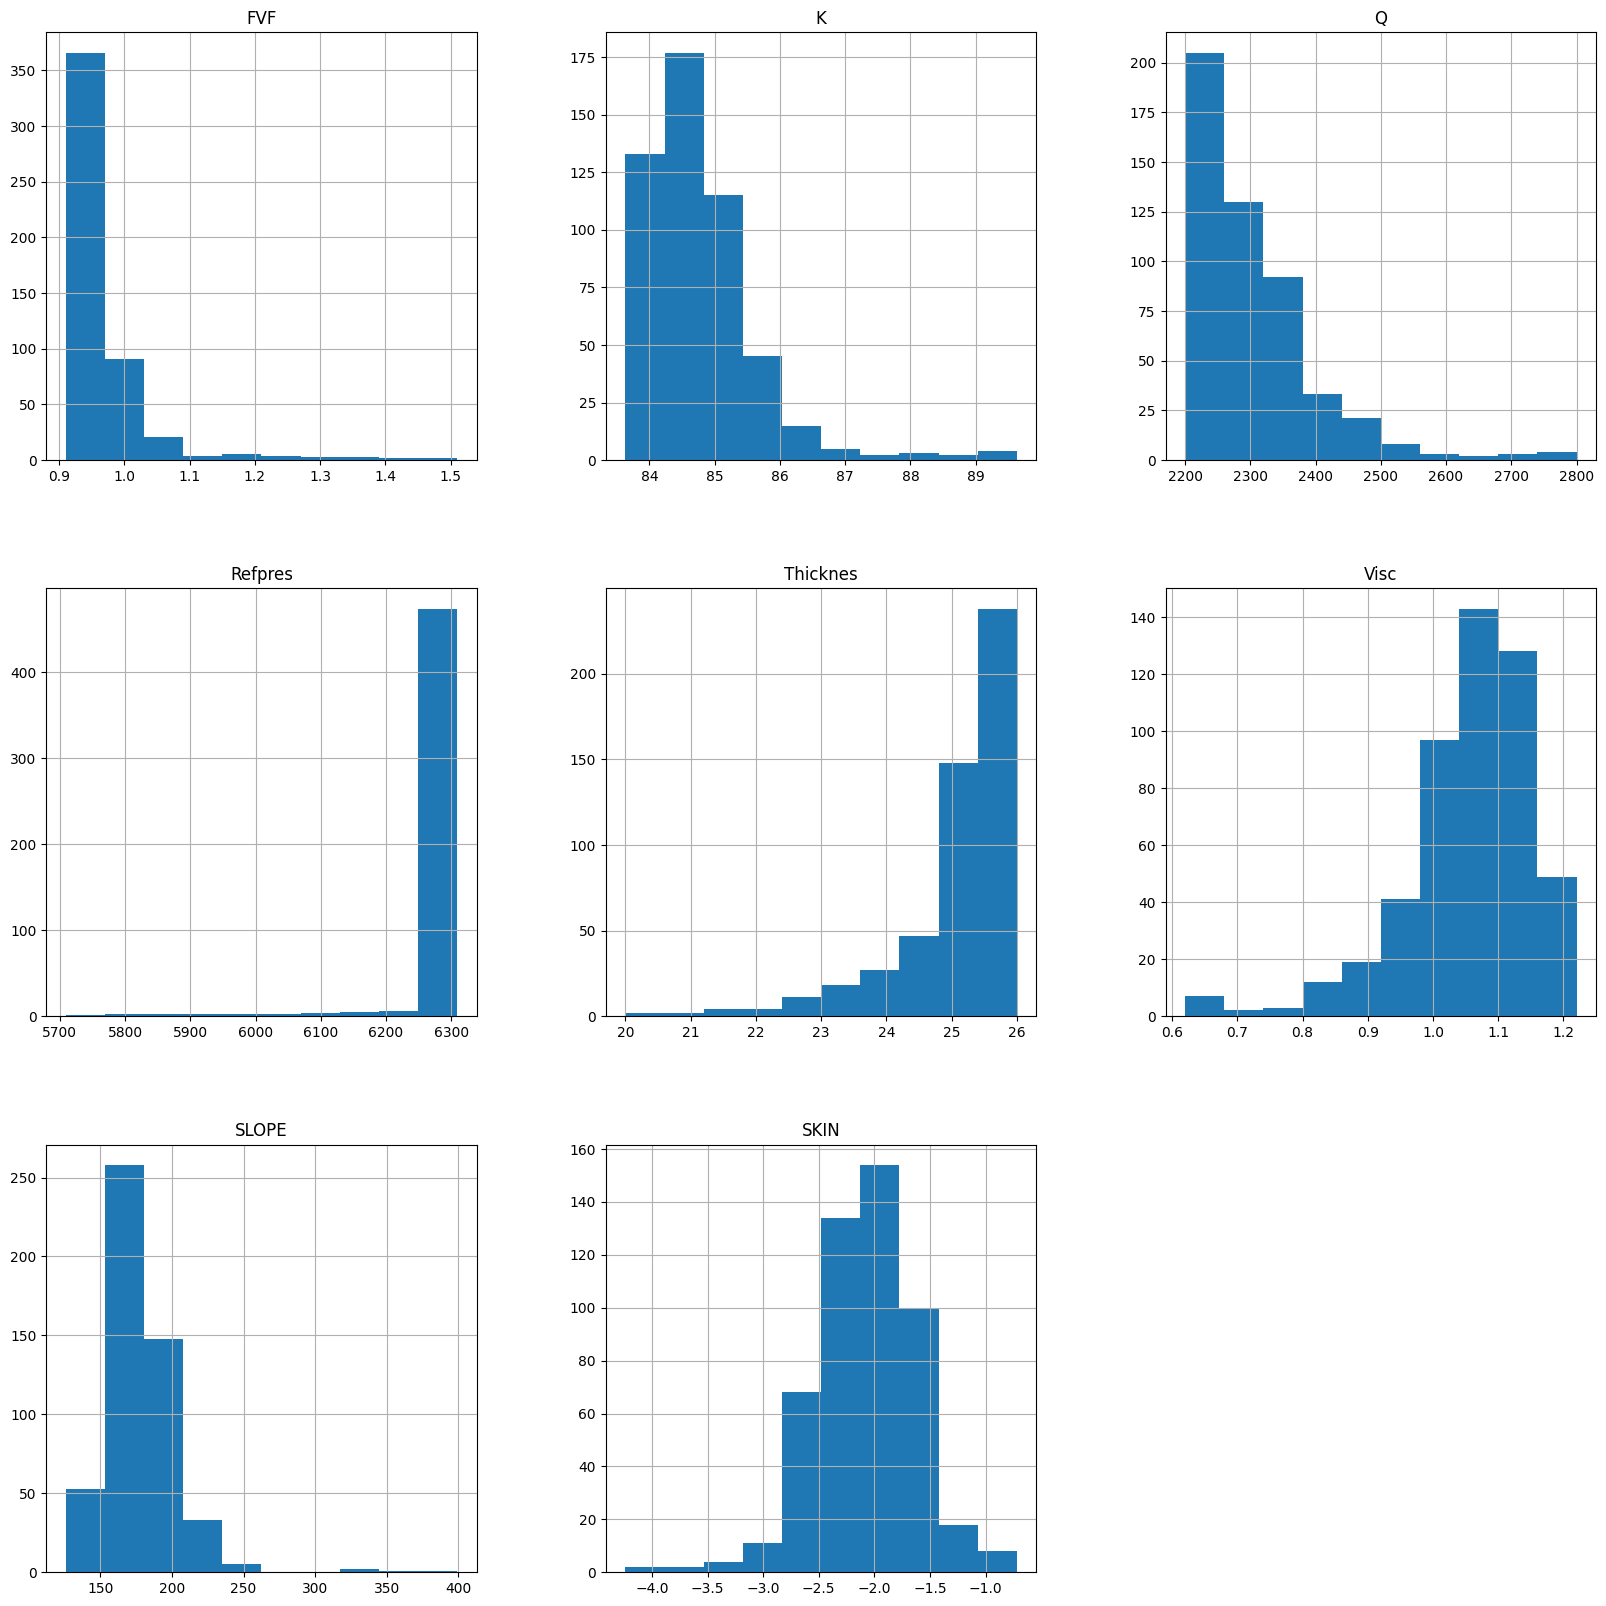

In [178]:
df.hist(figsize=(20, 20))

In [179]:
X = df.drop(columns="SKIN")
y = df.SKIN

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (101, 7), (400,), (101,))

In [180]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [181]:
X_train.columns

Index(['FVF', 'K', 'Q', 'Refpres', 'Thicknes', 'Visc', 'SLOPE'], dtype='object')

In [182]:
rsp.svm_poly_params

{'prep__numeric__poly__degree': Integer(low=1, high=3),
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__gamma': Real(low=-3, high=3, prior='log-uniform'),
 'algo__C': Real(low=-3, high=3, prior='log-uniform')}

In [183]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax', poly =1 ), X.columns )])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model_SVM = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_SVM.fit(X_train, y_train)

print(model_SVM.best_params_)
print(model_SVM.score(X_train, y_train), model_SVM.best_score_, model_SVM.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 93.84800715909546, 'algo__gamma': 0.13820379228637006}
0.9896044782354891 0.9820141898860976 0.9910553464311445


In [184]:
model_SVM.score(X_train, y_train), model_SVM.score(X_test, y_test)

(0.9896044782354891, 0.9910553464311445)

In [185]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual

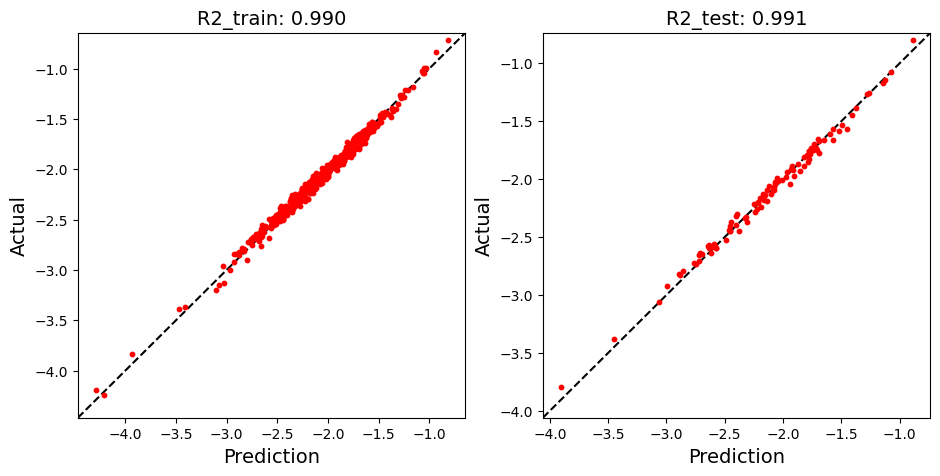

In [186]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model_SVM)

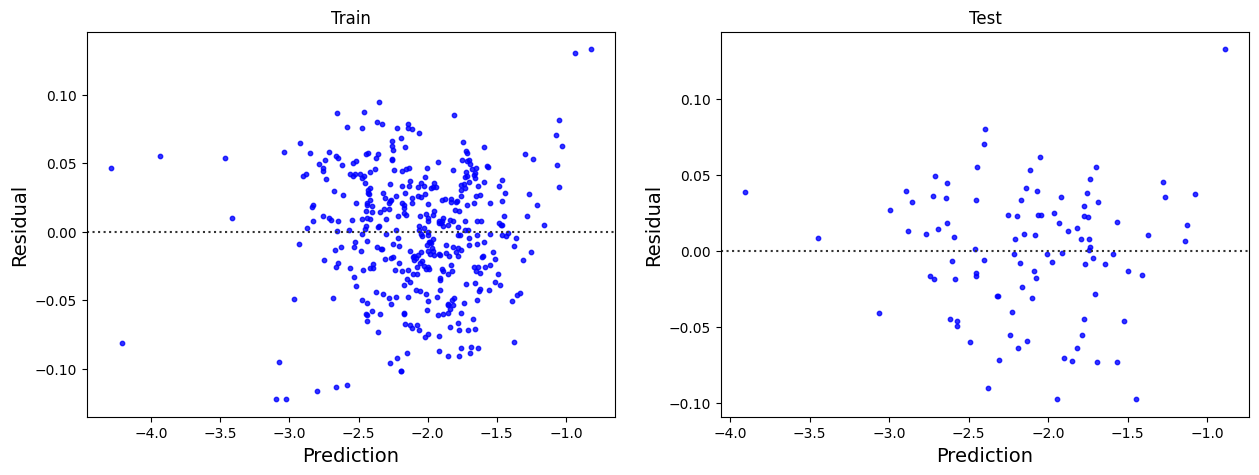

In [187]:
plot_residual(X_train, y_train, X_test, y_test, model_SVM)

In [188]:
from jcopml.feature_importance import mean_loss_decrease
from jcopml.feature_importance import mean_score_decrease

In [189]:
X_train.iloc[:1]

,FVF,K,Q,Refpres,Thicknes,Visc,SLOPE
ID,,,,,,,
387,0.919,83.811,2221,6297,25.85,1.04,159.314895


In [190]:
X_pred = pd.DataFrame([[0.919, 83.811, 2221, 6297, 1.04, 25.85, 159.314895]], columns=X_train.columns)
X_pred

,FVF,K,Q,Refpres,Thicknes,Visc,SLOPE
0,0.919,83.811,2221,6297,1.04,25.85,159.314895


In [191]:
model_SVM.predict(X_pred)

array([-1.37650079])

,feature,importance,stdev
5,Visc,0.823816,0.041523
0,FVF,0.387553,0.016089
4,Thicknes,0.164059,0.009146
2,Q,0.141996,0.011489
6,SLOPE,0.090120,0.006149
1,K,0.011113,0.000721
3,Refpres,0.003149,0.000150


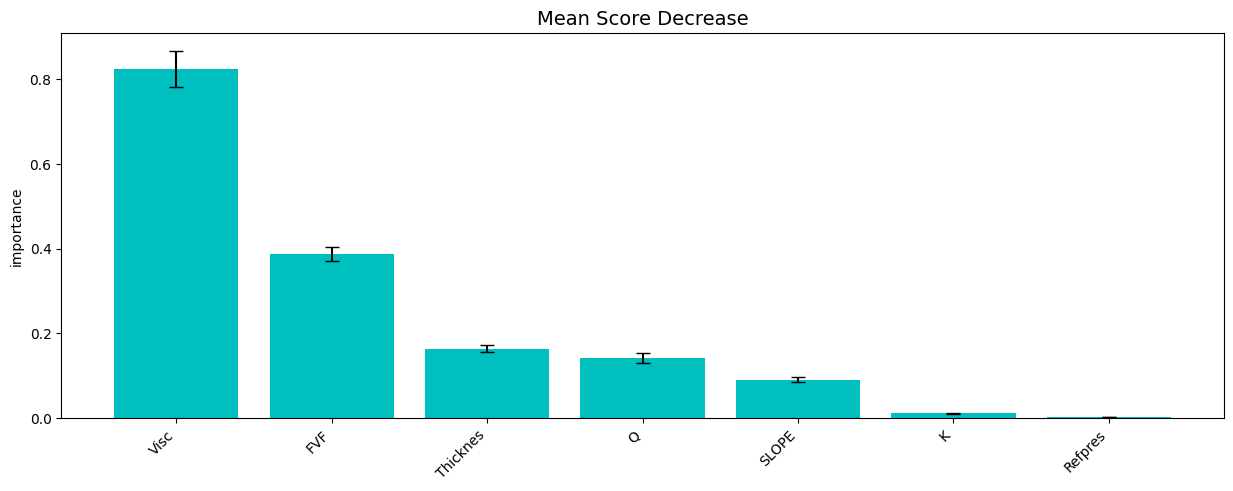

In [192]:
mean_score_decrease(X_train, y_train, model_SVM, plot = True, topk = None)

In [195]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['FVF', 'Q', 'Refpres', 'Thicknes', 'Visc', 'K', 'SLOPE']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model_MAE = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, scoring= 'neg_mean_absolute_error', n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_MAE.fit(X_train, y_train)

print(model_MAE.best_params_)
print(model_MAE.score(X_train, y_train), model_MAE.best_score_, model_MAE.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 3.5849855803404798, 'algo__gamma': 0.0018997763474111289}
-0.05622259842578934 -0.12971384875058664 -0.1387853132406275


In [196]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['FVF', 'Q', 'Refpres', 'Thicknes', 'Visc', 'K', 'SLOPE']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVR(max_iter=500))
])


model_MSE = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, scoring= 'neg_mean_squared_error', n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model_MSE.fit(X_train, y_train)

print(model_MSE.best_params_)
print(model_MSE.score(X_train, y_train), model_MSE.best_score_, model_MSE.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 3.5849855803404798, 'algo__gamma': 0.0018997763474111289}
-0.00422946818851824 -0.07242964411326615 -0.0794360530565351


In [197]:
save_model(model_SVM, "Predict_Effective-Oil-Skin_s")

Model is pickled as model/Predict_Effective-Oil-Skin_s


In [198]:
K_test = model_SVM.predict(X_test)
K_train = model_SVM.predict(X_train)

In [199]:
load_model('model/Predict_Effective-Oil-Skin_s')

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               Index(['FVF', 'K', 'Q', 'Refpres', 'Thicknes', 'Visc', 'SLOPE'], dtype='object'))])),
                                             ('algo', SVR(max_iter=500))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'algo__C': Real(low=-3, high=3, prior='log-uniform'),
                                        'algo__gamma': Real(low=-3, high=3, prior='log-uniform')},
                   random_state=42, verbose=1)

In [200]:
X_train.head()

,FVF,K,Q,Refpres,Thicknes,Visc,SLOPE
ID,,,,,,,
387,0.919,83.811,2221,6297,25.85,1.040,159.314895
20,1.210,87.831,2800,6189,25.40,0.800,197.547886
323,0.922,84.081,2248,6294,25.82,1.211,187.991324
333,0.970,83.781,2269,6309,25.31,1.172,197.795633
57,0.928,83.991,2479,6309,25.64,1.121,194.715213


In [201]:
df.columns

Index(['FVF', 'K', 'Q', 'Refpres', 'Thicknes', 'Visc', 'SLOPE', 'SKIN'], dtype='object')

In [202]:
input_variable_test = df.drop(columns = 'SKIN')

In [203]:
SKin_Predict_SVM = model_SVM.predict(input_variable_test)
df.insert(6, column = 'Skin_SVM', value = SKin_Predict_SVM, allow_duplicates = False)

In [204]:
df.head(20)

,FVF,K,Q,Refpres,Thicknes,Visc,Skin_SVM,SLOPE,SKIN
ID,,,,,,,,,
1,1.21,86.631,2500,6009,23.0,0.92,-3.062728,227.108079,-3.05979
2,1.33,87.231,2740,5769,26.0,0.98,-3.414050,256.038115,-3.37194
3,1.09,84.831,2680,5889,24.2,0.74,-2.175571,171.215706,-2.17501
4,1.27,84.231,2500,6189,24.8,0.74,-2.358950,182.882586,-2.42630
5,1.45,84.831,2440,6009,21.8,0.80,-3.469248,248.861249,-3.38240
6,0.97,88.431,2260,5949,23.6,0.86,-1.389637,146.886752,-1.45902
7,1.51,87.231,2680,6249,20.0,0.98,-4.292803,369.621744,-4.19282
8,1.51,89.031,2320,6069,21.2,0.68,-2.803408,205.218861,-2.90332
9,1.27,87.831,2200,6129,26.0,1.16,-2.970029,230.772342,-2.99861


In [205]:
input_variable_test.head()

,FVF,K,Q,Refpres,Thicknes,Visc,SLOPE
ID,,,,,,,
1,1.21,86.631,2500,6009,23.0,0.92,227.108079
2,1.33,87.231,2740,5769,26.0,0.98,256.038115
3,1.09,84.831,2680,5889,24.2,0.74,171.215706
4,1.27,84.231,2500,6189,24.8,0.74,182.882586
5,1.45,84.831,2440,6009,21.8,0.80,248.861249


In [206]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            492, 493, 494, 495, 496, 497, 498, 499, 500, 501],
           dtype='int64', name='ID', length=501)

In [207]:
df.reset_index(inplace=True)
df

,ID,FVF,K,Q,Refpres,Thicknes,Visc,Skin_SVM,SLOPE,SKIN
0,1,1.210,86.631,2500,6009,23.00,0.920,-3.062728,227.108079,-3.05979
1,2,1.330,87.231,2740,5769,26.00,0.980,-3.414050,256.038115,-3.37194
2,3,1.090,84.831,2680,5889,24.20,0.740,-2.175571,171.215706,-2.17501
3,4,1.270,84.231,2500,6189,24.80,0.740,-2.358950,182.882586,-2.42630
4,5,1.450,84.831,2440,6009,21.80,0.800,-3.469248,248.861249,-3.38240
...,...,...,...,...,...,...,...,...,...,...
496,497,0.910,85.011,2272,6306,25.94,1.139,-2.043282,173.639645,-2.01626
497,498,0.943,84.051,2224,6303,25.94,1.076,-1.914804,168.293147,-1.91389
498,499,1.000,84.321,2278,6306,25.37,1.067,-2.237077,184.749157,-2.28169
499,500,0.949,84.591,2212,6300,25.70,1.061,-1.865697,166.582731,-1.88238


In [208]:
compare = df.head(500)
compare

,ID,FVF,K,Q,Refpres,Thicknes,Visc,Skin_SVM,SLOPE,SKIN
0,1,1.210,86.631,2500,6009,23.00,0.920,-3.062728,227.108079,-3.05979
1,2,1.330,87.231,2740,5769,26.00,0.980,-3.414050,256.038115,-3.37194
2,3,1.090,84.831,2680,5889,24.20,0.740,-2.175571,171.215706,-2.17501
3,4,1.270,84.231,2500,6189,24.80,0.740,-2.358950,182.882586,-2.42630
4,5,1.450,84.831,2440,6009,21.80,0.800,-3.469248,248.861249,-3.38240
...,...,...,...,...,...,...,...,...,...,...
495,496,0.991,84.291,2263,6309,25.73,1.121,-2.314684,188.479174,-2.33010
496,497,0.910,85.011,2272,6306,25.94,1.139,-2.043282,173.639645,-2.01626
497,498,0.943,84.051,2224,6303,25.94,1.076,-1.914804,168.293147,-1.91389
498,499,1.000,84.321,2278,6306,25.37,1.067,-2.237077,184.749157,-2.28169


In [209]:
compare.to_excel("HasilTAFairuzdebytamaraFix.xlsx",index = False)

In [210]:
def get_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_pred-y_true)**2.0)) 

def get_rel_l2_error(y_true, y_pred):
    return np.linalg.norm(y_true-y_pred, 2) / np.linalg.norm(y_true, 2)

In [211]:
x1 = df.ID
y1 = df.SKIN
y2 = df.Skin_SVM

Text(0, 0.5, 'SKIN')

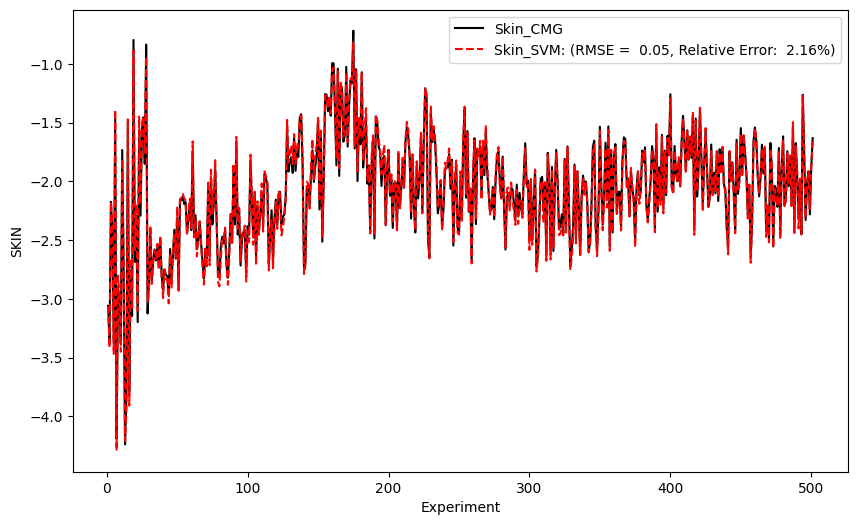

In [212]:
fig = plt.figure(figsize= (10, 6))
ax = plt.axes()

rmse_SV = get_rmse(df['SKIN'], df['Skin_SVM']) 
l2_SV = get_rel_l2_error(df['SKIN'], df['Skin_SVM']) * 100

ax.plot(x1, y1, 'k-', label = 'Skin_CMG')
ax.plot(x1, y2, 'r--', label = f'Skin_SVM: (RMSE = {rmse_SV: .2f}, Relative Error: {l2_SV: .2f}%)')

ax.legend()
plt.xlabel('Experiment')
plt.ylabel('SKIN')